<a href="https://colab.research.google.com/github/anushapalisetty/Intel-Image-Classification/blob/main/Densnet_GitIntel_Image_Classification_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import cv2
import pandas as pd




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
#Image Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,horizontal_flip=True,shear_range=0.2,  
    zoom_range=0.2, validation_split=0.1)

"""train_datagen = ImageDataGenerator(rescale = 1./255,
	    rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.01,
      zoom_range=[0.1, 1.5],
      horizontal_flip=True,
      fill_mode='nearest',
      zca_whitening=True,
      brightness_range=[0.1, 2]
)"""


train_generator=train_datagen.flow_from_directory(
     '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2209,
      subset='training'
    
)

validation_generator=train_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2209,
      subset='validation'
    
)

test_datagen = ImageDataGenerator(rescale = 1./255.)
#test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_test/seg_test/', 
    target_size=(150,150),
    batch_size=64,
    class_mode='sparse',
    seed=2209
) 

 

Found 12667 images belonging to 6 classes.
Found 1406 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# **DenseNet121**

In [6]:
from keras.layers import *
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np 
from keras.applications.densenet import DenseNet121
import keras


base_model1=DenseNet121(include_top=False, weights= 'imagenet',  input_shape=(150,150,3), pooling='avg')
base_model1.trainable = False

x = Dense(256, activation='relu')(base_model1.output)
x = Dropout(0.5)(x)
x = Dense(6, activation='softmax')(x)

transfer_model1 = Model(base_model1.input, x) 
transfer_model1.compile(optimizer =keras.optimizers.Adam(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

29089792/29084464 [==============================] - 1s 0us/step


In [7]:
import tensorflow as tf
reduce = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
history2 = transfer_model1.fit_generator(
            train_generator,
            steps_per_epoch=int(12667 /64),
            epochs=30,
            validation_data=validation_generator,
            validation_steps=int(1406 /64),
            callbacks=[reduce],
            verbose=1)
transfer_model1.save('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/model_Dense_Git_5.hd5')


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
197/197 [==============================] - 6553s 33s/step - loss: 0.9894 - accuracy: 0.6433 - val_loss: 0.4336 - val_accuracy: 0.8460
Epoch 2/30
197/197 [==============================] - 82s 418ms/step - loss: 0.5066 - accuracy: 0.8101 - val_loss: 0.3421 - val_accuracy: 0.8824
Epoch 3/30
197/197 [==============================] - 82s 414ms/step - loss: 0.4280 - accuracy: 0.8417 - val_loss: 0.3274 - val_accuracy: 0.8854
Epoch 4/30
197/197 [==============================] - 80s 405ms/step - loss: 0.3865 - accuracy: 0.8590 - val_loss: 0.3127 - val_accuracy: 0.8869
Epoch 5/30
197/197 [==============================] - 81s 409ms/step - loss: 0.3535 - accuracy: 0.8688 - val_loss: 0.2985 - val_accuracy: 0.8936
Epoch 6/30
197/197 [==============================] - 83s 419ms/step - loss: 0.3450 - accuracy: 0.8716 - val_loss: 0.2848 - val_accuracy: 0.8988
Epoch 7/30
197/197 [==============================] - 

In [8]:
transfer_model1.save('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/model_Dense_Git_pro5.hd5')

import pandas as pd
df_cnn = pd.DataFrame(history2.history)      
# saving the dataframe  
df_cnn.to_csv('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/model_Dense_Git_5_History.csv')  

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/DL_Project_Data/model_Dense_Git_pro5.hd5/assets


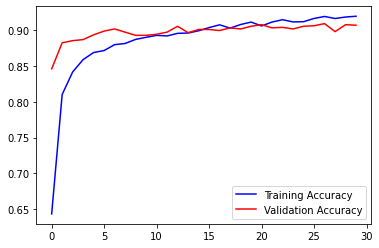

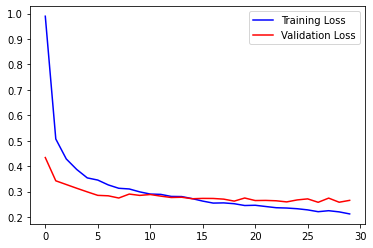

In [9]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()

In [13]:
import tensorflow as tf
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
accuracy=transfer_model1.evaluate(test_generator,steps=len(test_generator)//32,callbacks=[reduce],verbose=2)
print('Accuracy of the model on the test set: ',accuracy[1])

1/1 - 0s - loss: 0.1862 - accuracy: 0.9531
Accuracy of the model on the test set:  0.953125


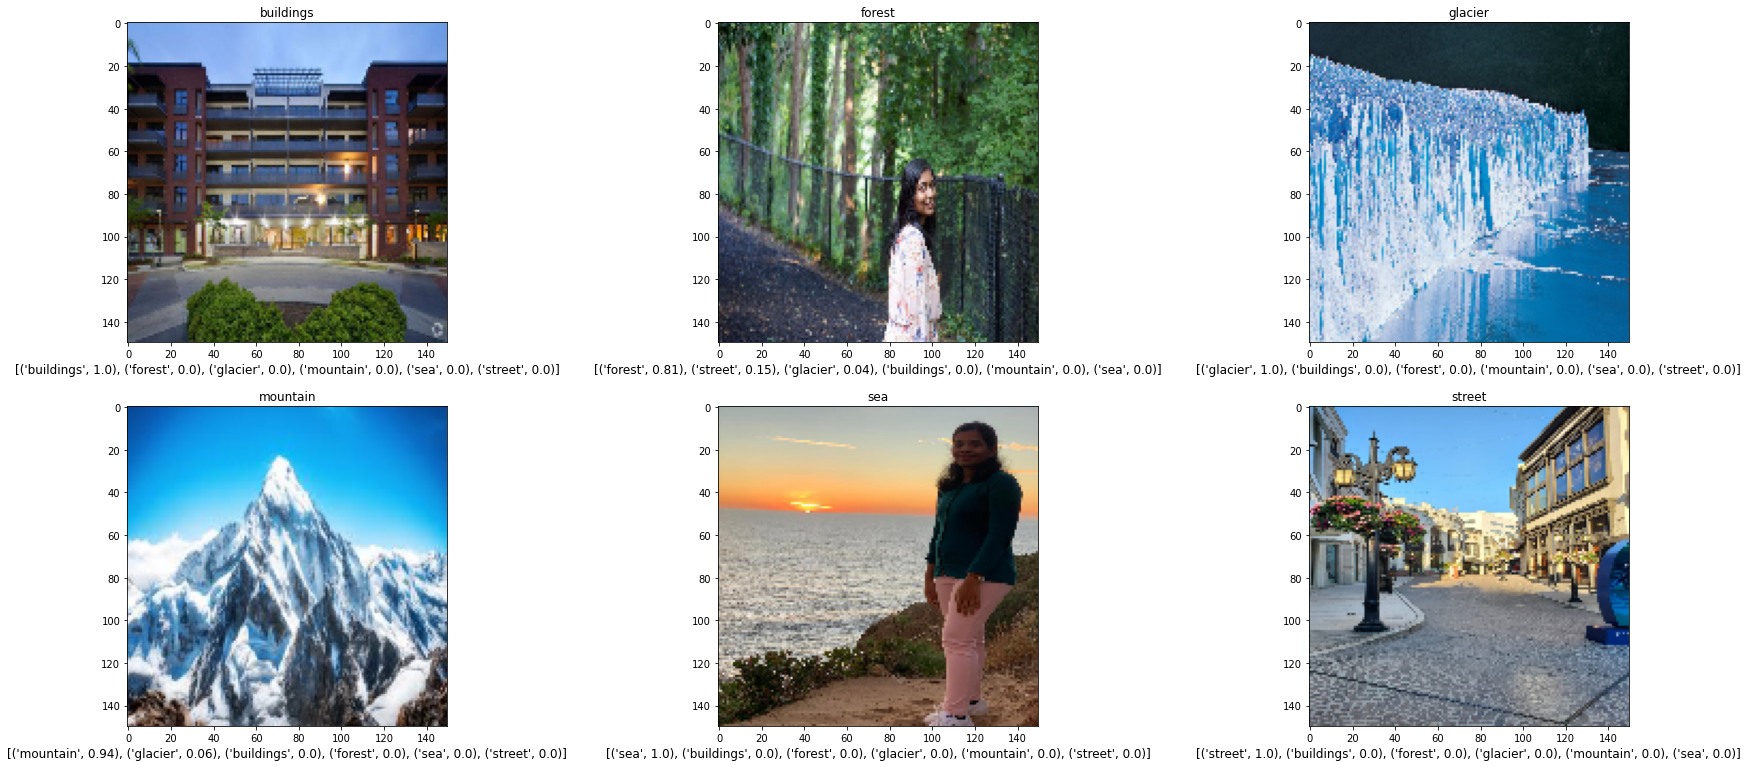

In [21]:
import numpy as np 
import cv2
import pandas as pd
import tensorflow as tf
from keras.models import Model
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def img_reshape(img):
  img=cv2.resize(img,(150,150))
  plt.imshow(img.reshape([150,150,3]))
  img = np.reshape(img,[1,150,150,3])
  return img/255.


import operator
classes1=['buildings', 'forest' , 'glacier' , 'mountain', 'sea', 'street']
images=['eon_building.jpeg','meg_forest.jpeg','glacier_1.jpeg','mountain_1.jpg','Anusha-Sea.jpeg','street_1.jpeg']
#images=['georgia-state-university-1.png','forest.jpg','glacier.jpg','Pooru-Mountain.jpeg','Meg_Sea.jpg','Cali_street.jpg']
#images=['25pp.jpg','yosimite_forest.png','6.jpg','28.jpg','Anusha-Sea.jpeg','holl_street.jpg']
#images=['25pp.jpg','yosimite_forest.png','glacier_3.jpg','mountain_2.jpg','Anusha-Sea.jpeg','street_1.jpeg']
#images=['5.jpg','forest.jpg','glacier_2.jpg','28.jpg','171.jpg','69.jpg'] #- Perfect
nrows=3
ncols=3
j=0

path='/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_pred/seg_pred/'

plt.figure(figsize=[30,20])
for i, img in enumerate(images):
  labels={}
  sp=plt.subplot(nrows,ncols,i+1)
  #sp.axis('Off')
  plt.imshow(mpimg.imread(path+img))
  image=mpimg.imread(path+img)
  im_reshape=img_reshape(image)
  a=transfer_model1.predict(im_reshape).round(2)
  for j,label in enumerate(classes1):
      labels[classes1[j]]=a[0][j]
  sorted_d = sorted(labels.items(), key=operator.itemgetter(1),reverse=True)
  #print(sorted_d)


  if i%3==0 and i>=3:
    j=j+1
  sp.set_xlabel(sorted_d,fontsize=12)
  sp.title.set_text(classes1[i])
  

  
plt.show()